In [11]:
import requests
from bs4 import BeautifulSoup
from urllib import request
import nltk
import os
import argparse
import sys
from os import listdir
from os.path import isfile, join
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import doc2vec
import gensim
from collections import namedtuple
import smart_open
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#We first scrappe Gutenberg 100 most popular books page. 
#https://katherinepully.com/project-gutenberg-scraper/

session = requests.Session()
books_directory="/Users/benjaminfell/gutenberg_data/text/"
gutenberg_url = "https://www.gutenberg.org/"

def get_links(url):
        r = session.get(url)
        soup = BeautifulSoup(r.content, features="lxml")
        data_links = soup.findAll("a", {"class": "link"})
        data_link = gutenberg_url + get_text_or_html_link(data_links)
        return data_link
    
def get_text_or_html_link(links): 
        plaintext_link, html_link = "",""
        for link in links:
            if "Plain Text" in str(link):
                plaintext_link=link["href"]
            elif "HTML" in str(link):
                html_link=link["href"]   
            
        data_link=""
        if (plaintext_link):
            data_link=plaintext_link
        elif (html_link):
            data_link=html_link
        return data_link
    
def download_book(booktitle,data_link):
        print("Downloading " % (booktitle))
        r=session.get(data_link)
        filename=books_directory+booktitle+".txt"
        file = open(filename, "w")
        file.write(r.text)
        file.close()
       

In [ ]:
r = session.get(URL)
soup = BeautifulSoup(r.content, features="lxml")
books = soup.findAll("li")
        
books_links = {} 
        
for book in books[:100]:
    title = book.text
    link = book.find("a")["href"]
    if "ebooks" in str(book.find("a")["href"]):
        books_links[title]=link
                   
for book in books_links.items():
    title=book[0]
    book_download_link=book[1]
    url = gutenberg_url + book_download_link[1:]
    data_link=get_links(url)
    download_book(title, data_link)

In [2]:
#Since the genre (Subject) directories are empty on the _Gutenberg project, we will need to extract these manually. 
#We only care about the most representented genres so we don't annotate very specific genres.

books_path = "/Users/benjaminfell/gutenberg_data/text/"
onlyfiles = [f for f in listdir(books_path) if isfile(join(books_path, f)) and f.endswith(".txt")]

books_genres = {}

books_genres["The Republic by Plato (241)"]=["Classical literature","Political science -- Early works to 1800"]
books_genres["Moby Dick; Or, The Whale by Herman Melville (769)"]=["Psychological fiction","Adventure stories","Sea stories","Whaling -- Fiction","Ship captains -- Fiction"]
books_genres["Grimms' Fairy Tales by Jacob Grimm and Wilhelm Grimm (451)"]=["Fairy tales -- Germany"]
books_genres["Peter Pan by J. M.  Barrie (284)"]=["Fantasy literature","Fiction","Fairies -- Fiction","Pirates -- Fiction"]
books_genres["The Hound of the Baskervilles by Arthur Conan Doyle (243)"]=["Detective and mystery stories","Fiction","Dogs -- Fiction"]
books_genres["The Scarlet Letter by Nathaniel Hawthorne (891)"]=["Adultery -- Fiction","Historical fiction","Psychological fiction"]
books_genres["The Awakening, and Selected Short Stories by Kate Chopin (306)"]=["Adultery -- Fiction"]
books_genres["The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson (444)"]=["Science fiction","Horror tales","Physicians -- Fiction","Psychological fiction"]
books_genres["The Wonderful Wizard of Oz by L. Frank  Baum (246)"]=["Fantasy literature","Juvenile fiction"]
books_genres["The Youngest Girl in the School by Evelyn Sharp (433)"]=["Juvenile fiction"]
books_genres["Second Treatise of Government by John Locke (216)"]=["Political science -- Early works to 1800"]
books_genres["Pride and Prejudice by Jane Austen (1715)"]=["Young women -- Fiction","Love stories","Domestic fiction"]
books_genres["Treasure Island by Robert Louis Stevenson (219)"]=["Sea stories","Pirates -- Fiction"]
books_genres["The Iliad by Homer (389)"]=["Epic poetry"]
books_genres["A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (1921)"]=["Christmas stories","England -- Fiction","Ghost stories"]
books_genres["The Translations of Beowulf: A Critical Bibliography by Chauncey Brewster Tinker (315)"]=["Epic poetry"]
books_genres["A Gamekeeper's Note-book by Owen Jones and Marcus Woodward (744)"]=[]
books_genres["The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde (555)"]=["Comedies","Drama"]
books_genres["The Picture of Dorian Gray by Oscar Wilde (601)"]=["Didactic fiction","Supernatural -- Fiction"]
books_genres["Little Women by Louisa May Alcott (361)"]=["Young women -- Fiction","Domestic fiction","Biography","Bildungsromans"]
books_genres["Anne of Green Gables by L. M.  Montgomery (278)"]=["Orphans -- Fiction","Islands -- Fiction","Friendship -- Fiction","Bildungsromans"]
books_genres["Metamorphosis by Franz Kafka (423)"]=["Psychological fiction","Metamorphosis -- Fiction"]
books_genres["The Prince by Niccolò Machiavelli (493)"]=["State, The -- Early works to 1800","Philosophy"]
books_genres["The Adventures of Sherlock Holmes by Arthur Conan Doyle (669)"]=["England -- Fiction","Detective and mystery stories, English"]
books_genres["Crime and Punishment by Fyodor Dostoyevsky (464)"]=["Detective and mystery stories","Psychological fiction","Murder -- Fiction"]
books_genres["The Souls of Black Folk by W. E. B.  Du Bois (297)"]=["African Americans"]
books_genres["Joseph and his Brethren by W. K.  Tweedie (480)"]=[]
books_genres["Adventures of Huckleberry Finn by Mark Twain (355)"]=["Humorous stories","Adventure stories","Boys -- Fiction","Bildungsromans"]
books_genres["Dubliners by James Joyce (341)"]=["Short stories","Dublin (Ireland) -- Fiction"]
books_genres["A Christmas Carol by Charles Dickens (263)"]=["Christmas stories","England -- Fiction","Ghost stories"]
books_genres["The Philippines a Century Hence by José Rizal (306)"]=["Philippines"]
books_genres["The Brothers Karamazov by Fyodor Dostoyevsky (235)"]=["Didactic fiction","Fathers and sons -- Fiction","Brothers -- Fiction"]
books_genres["The Romance of Lust: A classic Victorian erotic novel by Anonymous (220)"]=["Incest -- Fiction","Erotic stories"]
books_genres["A Pickle for the Knowing Ones by Timothy Dexter (486)"]=["Biography"]
books_genres["Märchen der Gebrüder Grimm 2 by Jacob Grimm and Wilhelm Grimm (220)"]=["Fairy tales -- Germany"]
books_genres["Anna Karenina by graf Leo Tolstoy (238)"]=["Adultery -- Fiction","Didactic fiction","Love stories"]
books_genres["Wuthering Heights by Emily Brontë (268)"]=["Psychological fiction","Love stories","Domestic fiction"]
books_genres["Ulysses by James Joyce (390)"]=["Psychological fiction","Domestic fiction","Epic literature","Married people -- Fiction","Male friendship -- Fiction"]
books_genres["Tractatus Logico-Philosophicus by Ludwig Wittgenstein (320)"]=["Philosophy"]
books_genres["The American Diary of a Japanese Girl by Yoné Noguchi (623)"]=["Japan -- Fiction"]
books_genres["A Modest Proposal by Jonathan Swift (607)"]=["Political satire, English","Religious satire, English","Ireland -- Politics and government -- 18th century -- Humor"]
books_genres["Heart of Darkness by Joseph Conrad (508)"]=["Psychological fiction","Imperialism -- Fiction"]
books_genres["A Warning to the Curious and Other Ghost Stories by M. R.  James (425)"]=[]
books_genres["A Tale of Two Cities by Charles Dickens (556)"]=["War stories","Historical fiction","England -- Fiction"]
books_genres["The Odyssey by Homer (248)"]=["Epic poetry"]
books_genres["Alice's Adventures in Wonderland by Lewis Carroll (748)"]=["Fantasy fiction","Imaginary places -- Juvenile fiction","Children's stories"]
books_genres["Japanese Girls and Women by Alice Mabel Bacon (404)"]=["Women -- Japan -- Social conditions"]
books_genres["Dracula by Bram Stoker (620)"]=["Horror tales","Gothic fiction","Vampires -- Fiction"]
books_genres["War and Peace by graf Leo Tolstoy (412)"]=["Historical fiction","War stories","Aristocracy (Social class) -- Russia -- Fiction"]
books_genres["Beyond Good and Evil by Friedrich Wilhelm Nietzsche (275)"]=["Ethics","Philosophy"]
books_genres["Les Misérables by Victor Hugo (217)"]=["Historical fiction","Epic literature","Orphans -- Fiction"]
books_genres["Essays of Michel de Montaigne — Complete by Michel de Montaigne (254)"]=[]
books_genres["Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (1963)"]=["Science fiction","Horror Tales","Gothic Fiction","Scientists -- Fiction"]
books_genres["The Kama Sutra of Vatsyayana by Vatsyayana (235)"]=["Love","Sex"]
books_genres["Walden, and On The Duty Of Civil Disobedience by Henry David Thoreau (341)"]=["Biography","Solitude","Natural history -- Massachusetts -- Walden Woods"]
books_genres["The Great Gatsby by F. Scott  Fitzgerald (510)"]=["Psychological fiction","Married women -- Fiction","First loves -- Fiction"]
books_genres["Kwaidan: Stories and Studies of Strange Things by Lafcadio Hearn (259)"]=["Ghost stories","Paranormal fiction","Japan -- Social life and customs -- Fiction"]
books_genres["The Prophet by Kahlil Gibran (282)"]=["Prose poems, American","Mysticism -- Poetry"]
books_genres["A Doll's House : a play by Henrik Ibsen (599)"]=["Drama"]
books_genres["Great Expectations by Charles Dickens (446)"]=["Orphans -- Fiction","England -- Fiction","Revenge -- Fiction","Bildungsromans"]
books_genres["Narrative of the Life of Frederick Douglass, an American Slave by Frederick Douglass (289)"]=["Biography"]
books_genres["The Yellow Wallpaper by Charlotte Perkins Gilman (503)"]=["Psychological fiction","Married women -- Psychology -- Fiction"]
books_genres["Siddhartha by Hermann Hesse (299)"]=["Spiritual life -- Fiction"]
books_genres["The Count of Monte Cristo, Illustrated by Alexandre Dumas (333)"]=["Historical fiction","Revenge -- Fiction","Adventure stories","Pirates -- Fiction"]
books_genres["The Adventures of Tom Sawyer, Complete by Mark Twain (238)"]=["Humorous stories","Boys -- Fiction","Adventure stories","Bildungsromans"]
books_genres["Anthem by Ayn Rand (218)"]=["Science fiction","Psychological fiction","Love stories","Men -- Psychology -- Fiction"]
books_genres["Don Quixote by Miguel de Cervantes Saavedra (249)"]=["Spain -- Social life and customs -- 16th century -- Fiction"]
books_genres["Summer by Romain Rolland (361)"]=[]
books_genres["Jane Eyre: An Autobiography by Charlotte Brontë (500)"]=["Orphans -- Fiction","England -- Fiction","Young women -- Fiction","Love stories","Bildungsromans"] 

In [3]:
#Let's see what genres are more represented in the 100 most popular books:
genres_dicc = {}
for k,v in books_genres.items():
    for genres in v:
        if genres in genres_dicc.keys():
            genres_dicc[genres] += 1
        else:
            genres_dicc[genres] = 1

In [4]:
for w in sorted(genres_dicc, key=genres_dicc.get, reverse=True):
    print(w, genres_dicc[w])


Psychological fiction 11
England -- Fiction 6
Bildungsromans 6
Historical fiction 5
Love stories 5
Adventure stories 4
Domestic fiction 4
Biography 4
Orphans -- Fiction 4
Pirates -- Fiction 3
Adultery -- Fiction 3
Science fiction 3
Young women -- Fiction 3
Epic poetry 3
Ghost stories 3
Didactic fiction 3
Philosophy 3
Political science -- Early works to 1800 2
Sea stories 2
Fairy tales -- Germany 2
Fantasy literature 2
Fiction 2
Detective and mystery stories 2
Horror tales 2
Juvenile fiction 2
Christmas stories 2
Drama 2
Humorous stories 2
Boys -- Fiction 2
Epic literature 2
War stories 2
Revenge -- Fiction 2
Classical literature 1
Whaling -- Fiction 1
Ship captains -- Fiction 1
Fairies -- Fiction 1
Dogs -- Fiction 1
Physicians -- Fiction 1
Comedies 1
Supernatural -- Fiction 1
Islands -- Fiction 1
Friendship -- Fiction 1
Metamorphosis -- Fiction 1
State, The -- Early works to 1800 1
Detective and mystery stories, English 1
Murder -- Fiction 1
African Americans 1
Short stories 1
Dublin (

#Fiction Books:  43
#Non-Fiction Books:  26


<BarContainer object of 2 artists>

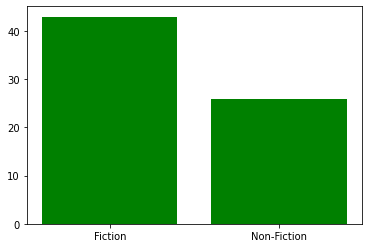

In [5]:
#Let's see how many books are Fiction related vs non Fiction
fiction_dicc = {}
fiction_dicc["Fiction"] = 0
fiction_dicc["Non-Fiction"] = 0
for k,v in books_genres.items():
    isFiction = False
    for genres in v:
        if "fiction" in genres.lower():
            isFiction = True
            
    if isFiction:
        fiction_dicc["Fiction"] += 1
    else:
        fiction_dicc["Non-Fiction"] += 1

    
print("#Fiction Books: ",fiction_dicc["Fiction"])
print("#Non-Fiction Books: ",fiction_dicc["Non-Fiction"])

limit = 20

plt.bar(fiction_dicc.keys(), fiction_dicc.values(), color='g')


In [6]:
#Method for reading a file into gensim model, with a tag
def read_corpus(fname, tag):
    with smart_open.open(fname, encoding="utf-8") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            yield gensim.models.doc2vec.TaggedDocument(tokens, tag)
            
            

In [7]:
#We now create a corpus for each fiction and non-fiction genres. 
#We use the first 26 Fiction books from Fiction to address for class imbalance.

train_corpus = []
test_corpus = []

counter_nf = 0
counter_f = 0

for k,v in books_genres.items():
    isFiction = False
    for genres in v:
        if "fiction" in genres.lower():
            isFiction = True  
            
    if isFiction and counter_f <= limit:
        train_corpus.extend(list(read_corpus(books_path+k+".txt", [1])))
        print("Processed into Fiction: ",k," Genres: ",v)
        counter_f += 1
        
    elif not isFiction and counter_f <= limit:  
        train_corpus.extend(list(read_corpus(books_path+k+".txt", [0])))
        print("Processed into Non-Fiction: ",k," Genres: ",v)
        counter_nf += 1

    else:
        train_corpus.extend(list(read_corpus(books_path+k+".txt", ["{}".format(k)])))
        print("Processed TEST: ",k," Genres: ",v)



Processed into Non-Fiction:  The Republic by Plato (241)  Genres:  ['Classical literature', 'Political science -- Early works to 1800']
Processed into Fiction:  Moby Dick; Or, The Whale by Herman Melville (769)  Genres:  ['Psychological fiction', 'Adventure stories', 'Sea stories', 'Whaling -- Fiction', 'Ship captains -- Fiction']
Processed into Non-Fiction:  Grimms' Fairy Tales by Jacob Grimm and Wilhelm Grimm (451)  Genres:  ['Fairy tales -- Germany']
Processed into Fiction:  Peter Pan by J. M.  Barrie (284)  Genres:  ['Fantasy literature', 'Fiction', 'Fairies -- Fiction', 'Pirates -- Fiction']
Processed into Fiction:  The Hound of the Baskervilles by Arthur Conan Doyle (243)  Genres:  ['Detective and mystery stories', 'Fiction', 'Dogs -- Fiction']
Processed into Fiction:  The Scarlet Letter by Nathaniel Hawthorne (891)  Genres:  ['Adultery -- Fiction', 'Historical fiction', 'Psychological fiction']
Processed into Fiction:  The Awakening, and Selected Short Stories by Kate Chopin (30

Processed TEST:  The Count of Monte Cristo, Illustrated by Alexandre Dumas (333)  Genres:  ['Historical fiction', 'Revenge -- Fiction', 'Adventure stories', 'Pirates -- Fiction']
Processed TEST:  The Adventures of Tom Sawyer, Complete by Mark Twain (238)  Genres:  ['Humorous stories', 'Boys -- Fiction', 'Adventure stories', 'Bildungsromans']
Processed TEST:  Anthem by Ayn Rand (218)  Genres:  ['Science fiction', 'Psychological fiction', 'Love stories', 'Men -- Psychology -- Fiction']
Processed TEST:  Don Quixote by Miguel de Cervantes Saavedra (249)  Genres:  ['Spain -- Social life and customs -- 16th century -- Fiction']
Processed TEST:  Summer by Romain Rolland (361)  Genres:  []
Processed TEST:  Jane Eyre: An Autobiography by Charlotte Brontë (500)  Genres:  ['Orphans -- Fiction', 'England -- Fiction', 'Young women -- Fiction', 'Love stories', 'Bildungsromans']


In [8]:
#We create and train our model
model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=15)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)


In [12]:
#This is the list of books we didn't tag into our fiction and non-fiction vectors, and are the ones we will 
#calculate similarity against.
model.docvecs.index_to_key[2:]

['The Romance of Lust: A classic Victorian erotic novel by Anonymous (220)',
 'A Pickle for the Knowing Ones by Timothy Dexter (486)',
 'Märchen der Gebrüder Grimm 2 by Jacob Grimm and Wilhelm Grimm (220)',
 'Anna Karenina by graf Leo Tolstoy (238)',
 'Wuthering Heights by Emily Brontë (268)',
 'Ulysses by James Joyce (390)',
 'Tractatus Logico-Philosophicus by Ludwig Wittgenstein (320)',
 'The American Diary of a Japanese Girl by Yoné Noguchi (623)',
 'A Modest Proposal by Jonathan Swift (607)',
 'Heart of Darkness by Joseph Conrad (508)',
 'A Warning to the Curious and Other Ghost Stories by M. R.  James (425)',
 'A Tale of Two Cities by Charles Dickens (556)',
 'The Odyssey by Homer (248)',
 "Alice's Adventures in Wonderland by Lewis Carroll (748)",
 'Japanese Girls and Women by Alice Mabel Bacon (404)',
 'Dracula by Bram Stoker (620)',
 'War and Peace by graf Leo Tolstoy (412)',
 'Beyond Good and Evil by Friedrich Wilhelm Nietzsche (275)',
 'Les Misérables by Victor Hugo (217)',
 '

In [13]:
#We extract our fiction and non-fiction vectors, and we compute similarity for each of the books
fiction_vec = model.docvecs[1]
non_fiction_vec = model.docvecs[0]

print("Cosine Similarities with Fiction vs Non-Fiction Embeddings:")
print()

for i in range(2,len(model.docvecs)):
    print()
    print(model.docvecs.index_to_key[i],"  ",books_genres[model.docvecs.index_to_key[i]])

    print("Fiction similarity: ",cosine_similarity([model.docvecs[i]], [fiction_vec]))
    print("Non-Fiction similarity: ",cosine_similarity([model.docvecs[i]], [non_fiction_vec])) 

    

Cosine Similarities with Fiction vs Non-Fiction Embeddings:


The Romance of Lust: A classic Victorian erotic novel by Anonymous (220)    ['Incest -- Fiction', 'Erotic stories']
Fiction similarity:  [[-0.05316773]]
Non-Fiction similarity:  [[0.02405052]]

A Pickle for the Knowing Ones by Timothy Dexter (486)    ['Biography']
Fiction similarity:  [[0.03112186]]
Non-Fiction similarity:  [[0.27475834]]

Märchen der Gebrüder Grimm 2 by Jacob Grimm and Wilhelm Grimm (220)    ['Fairy tales -- Germany']
Fiction similarity:  [[0.08288112]]
Non-Fiction similarity:  [[0.36124396]]

Anna Karenina by graf Leo Tolstoy (238)    ['Adultery -- Fiction', 'Didactic fiction', 'Love stories']
Fiction similarity:  [[0.39001006]]
Non-Fiction similarity:  [[0.22117396]]

Wuthering Heights by Emily Brontë (268)    ['Psychological fiction', 'Love stories', 'Domestic fiction']
Fiction similarity:  [[0.0976584]]
Non-Fiction similarity:  [[0.19259836]]

Ulysses by James Joyce (390)    ['Psychological fiction', 'D

RESULTS

We can see most of fiction categories were assigned properly. 

Only 13 of a total of 38 books were not classified correctly, yielding a 65.8% success rate.

The expections were the following:
- Jane Eyre: An Autobiography by Charlotte Brontë
- Don Quixote by Miguel de Cervantes Saavedra
- A Doll's House : a play by Henrik Ibsen
- Kwaidan: Stories and Studies of Strange Things by Lafcadio Hearn
- Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley
- Les Misérables by Victor Hugo
- War and Peace by graf Leo Tolstoy
- Dracula by Bram Stoker
- A Tale of Two Cities by Charles Dickens
- The American Diary of a Japanese Girl by Yoné Noguchi
- Ulysses by James Joyce
- Wuthering Heights by Emily Brontë
- The Romance of Lust: A classic Victorian erotic novel by Anonymous

This is a simple example of categories evaluation by using Ginsem doc2vec embeddings. Categories with more specificity can be studied with this same model but a much larger data set must be extracted to obtain representative genre vectors that can be used for evaluating books genres.
